In [1]:
#import libraries
import tmdbsimple as tmdb
from imdb import IMDb

%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#URL for key
#https://api.themoviedb.org/3/movie/550?api_key=822771ddecfdc59a99893ffeaa1ec9b4
tmdb.API_KEY = '822771ddecfdc59a99893ffeaa1ec9b4'##'455e4535405115285f107dc76734be7e'

In [3]:
url_incomplete = "https://raw.githubusercontent.com/paulharris171/cs109b-Movie-Prediction-/master/movie_dataframe3.csv?token=AKUONf52FJ75NLHCwumgyDXdbC-TqDZZks5ZEiZ2wA%3D%3D"
data_incomplete = pd.read_csv(url_incomplete)

In [4]:
url = "https://raw.githubusercontent.com/paulharris171/cs109b-Movie-Prediction-/master/complete_movie_dataframe.csv?token=AKUONUotZqrqVZOOtiPu7rkUS_4VDL4Nks5ZEnVOwA%3D%3D"
data = pd.read_csv(url)

In [5]:
data.head()

,director_name,budget,genres,actor_1_name,movie_title,plot_keywords,content_rating,genre_adjusted,all_keywords
0,James Cameron,237000000,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",CCH Pounder,Avatar,"['James Cameron', 'CCH Pounder', 'avatar', 'fu...",PG-13,Sci-Fi,"['James Cameron', 'CCH Pounder', 'avatar', 'fu..."
1,Gore Verbinski,300000000,"['Action', 'Adventure', 'Fantasy']",Johnny Depp,Pirates of the Caribbean: At World's End,"['Gore Verbinski', 'Johnny Depp', 'goddess', '...",PG-13,Action-Comedy,"['Gore Verbinski', 'Johnny Depp', 'goddess', '..."
2,Sam Mendes,245000000,"['Action', 'Adventure', 'Thriller']",Christoph Waltz,Spectre,"['Sam Mendes', 'Christoph Waltz', 'bomb', 'esp...",PG-13,Action-Comedy,"['Sam Mendes', 'Christoph Waltz', 'bomb', 'esp..."
3,Christopher Nolan,250000000,"['Action', 'Thriller']",Tom Hardy,The Dark Knight Rises,"['Christopher Nolan', 'Tom Hardy', 'deception'...",PG-13,Action-Comedy,"['Christopher Nolan', 'Tom Hardy', 'deception'..."
4,Andrew Stanton,263700000,"['Action', 'Adventure', 'Sci-Fi']",Daryl Sabara,John Carter,"['Andrew Stanton', 'Daryl Sabara', 'alien', 'a...",PG-13,Sci-Fi,"['Andrew Stanton', 'Daryl Sabara', 'alien', 'a..."


#### Testing Movie Link

In [6]:
#Search for The Matrix in TMDb
search = tmdb.Search()
response = search.movie(query='The Matrix')

#Initialize base structure for the posters 
base_url = "http://image.tmdb.org/t/p/w185"
matrix_poster = base_url + response['results'][0]['poster_path']
#Then write code to append the poster path to the end of base_url
print("The link for the movie poster is found below:")
matrix_poster

#import urllib
#urllib.urlretrieve(matrix, "local-filename.jpg")

# Here's the final product link  http://image.tmdb.org/t/p/w185/lZpWprJqbIFpEV5uoHfoK0KCnTW.jpg

The link for the movie poster is found below:


u'http://image.tmdb.org/t/p/w185/lZpWprJqbIFpEV5uoHfoK0KCnTW.jpg'

In [7]:
#### Testing Image

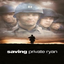

In [8]:
search = tmdb.Search()
response = search.movie(query='ryan')
base_url = "http://image.tmdb.org/t/p/w185"
matrix_poster = base_url + response['results'][0]['poster_path']
#Then write code to append the poster path to the end of base_url
matrix_poster
import urllib
from PIL import Image
urllib.urlretrieve(matrix_poster, "photos/local-filename.jpg")
one = Image.open('photos/local-filename.jpg')
one2 = one.resize((64, 64), Image.ANTIALIAS)
one2

## Implementation

In [9]:
print(set(data["genre_adjusted"]))
len(set(data["genre_adjusted"]))

set(['Sci-Fi', 'Crime', 'Romance', 'Animation', 'Music', 'Comedy', 'War', 'Horror', 'Adventure', 'Action-Comedy', 'Western', 'Thriller', 'Game-Show', 'Mystery', 'Drama', 'Action', 'Documentary', 'Musical', 'History', 'Family', 'Fantasy', 'Rom-Com', 'Sport', 'Biography'])


24

In [36]:
import time
#base url
base_url = "http://image.tmdb.org/t/p/w185"
search = tmdb.Search()
images = 0
genres = []
count = 1
k = 40
switch = False
#Create for loop that cycles through dataframe.movie_title
for i in range(len(data["movie_title"])):
    ####
    #Search for movie.
    movie_title = data["movie_title"][i][:-2]
    response = search.movie(query=movie_title)
    #Create movie poster url.
    print(movie_title)
    if (response['total_results'] != 0):
        if (response['results'][0]['poster_path'] is not None):
            ## There is only one Romance, Game-Show, and Music in the data
            if(data["genre_adjusted"][i] != 'Romance' and data["genre_adjusted"][i] != 'Game-Show' and data["genre_adjusted"][i] != 'Music'):
                poster_url = base_url + response['results'][0]['poster_path']
                #Retrieve jpg version from url.
                urllib.urlretrieve(poster_url, "photos/local-file.jpg")
                img = Image.open('photos/local-file.jpg')
                #RGBA check.
                img = img.convert('RGB')
                #Resize.
                img = img.resize((185, 185), Image.ANTIALIAS)
                img = np.array(img)
                img = np.expand_dims(img, axis = 0)
                #Add image to numpy array stack
                if(i == 0):
                    images = img
                else:
                    images = np.concatenate((images, img))

                ## add to genres
                genres = np.append(genres, data["genre_adjusted"][i])
            

    if(count == k):
        k += 40
        time.sleep(10)
        if switch:
            print(count)
            switch = False
        else:
            switch = True
    count += 1


Avatar
Pirates of the Caribbean: At World's End
Spectre
The Dark Knight Rises
John Carter
Spider-Man 3
Tangled
Avengers: Age of Ultron
Harry Potter and the Half-Blood Prince
Batman v Superman: Dawn of Justice
Superman Returns
Quantum of Solace
Pirates of the Caribbean: Dead Man's Chest
The Lone Ranger
Man of Steel
The Chronicles of Narnia: Prince Caspian
The Avengers
Pirates of the Caribbean: On Stranger Tides
Men in Black 3
The Hobbit: The Battle of the Five Armies
The Amazing Spider-Man
Robin Hood
The Hobbit: The Desolation of Smaug
The Golden Compass
King Kong
Titanic
Captain America: Civil War
Battleship
Jurassic World
Skyfall
Spider-Man 2
Iron Man 3
Alice in Wonderland
X-Men: The Last Stand
Monsters University
Transformers: Revenge of the Fallen
Transformers: Age of Extinction
Oz the Great and Powerful
The Amazing Spider-Man 2
TRON: Legacy
Cars 2
Green Lantern
Toy Story 3
Terminator Salvation
Furious 7
World War Z
X-Men: Days of Future Past
Star Trek Into Darkness
Jack the Giant S

In [37]:
#np.save("images_numpy.npy",images)
#np.save("genres_numpy.npy", genres)
#np.save("images_numpy_big.npy",images)
#np.save("genres_numpy_big.npy", genres)

In [10]:
images = np.load("images_numpy_big.npy")
genres = np.load("genres_numpy_big.npy")

# Keras - Scratch

In [14]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

Hello, TensorFlow!


In [13]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Merge, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

from keras.optimizers import SGD, Adam

from keras import backend as K

In [13]:
def shuffle_in_unison(a,b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)

shuffle_in_unison(images, genres)

In [14]:
n = len(images)
split = int(n * .8)
x_train = images[:split,]
x_test = images[split:,]
y_train = genres[:split]
y_test = genres[split:]


In [15]:
print(len(set(y_train)))
print(set(y_train))
print(len(set(y_test)))
print(set(y_test))

21
set(['Mystery', 'History', 'Sport', 'Sci-Fi', 'Family', 'Adventure', 'Horror', 'Thriller', 'Crime', 'Drama', 'Fantasy', 'Musical', 'Animation', 'Rom-Com', 'Action', 'Action-Comedy', 'Comedy', 'Documentary', 'War', 'Biography', 'Western'])
21
set(['Mystery', 'Comedy', 'Sci-Fi', 'Family', 'Adventure', 'Horror', 'Thriller', 'Sport', 'Rom-Com', 'Drama', 'Fantasy', 'Musical', 'Animation', 'Action', 'Western', 'Crime', 'Action-Comedy', 'Documentary', 'War', 'Biography', 'History'])


In [16]:
# input image dimensions
img_rows, img_cols = 185, 185

# smaller batch size means noisier gradient, but more updates per epoch
batch_size = 128
# this is fixed, we have 13 digits in our data set
#############SHOULD BE CHANGED ONCE WE HAVE MORE DATA###############
num_classes = 21
# number of iterations over the complete training data
epochs = 30

## X_train is of shape n_samples x 64 x 64
## for a CNN we want to keep the image shape
## need to explicitly tell keras that it is a gray value image
## so each image is 28x28x1 not 28x28x3
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

# normalize image values to [0,1]
# interestingly the keras example code does not center the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (3864, 185, 185, 3)
3864 train samples
967 test samples


In [17]:
# convert class vectors to binary class matrices
# keras likes one hot encoding instead of class names
y_train = np.array(pd.get_dummies(y_train))
y_test = np.array(pd.get_dummies(y_test))

In [18]:
input_shape = (img_rows, img_cols, 3)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [19]:
# this does all necessary compiling. In tensorflow this is much quicker than in theano
# the setup is our basic categorical crossentropy with stochastic gradient decent
# we also specify that we want to evaluate our model in terms of accuracy
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [20]:
# this is now the actual training
# in addition to the training data we provide validation data
# this data is used to calculate the performance of the model over all the epochs
# this is useful to determine when training should stop
# in our case we just use it to monitor the evolution of the model over the training epochs
# if we use the validation data to determine when to stop the training or which model to save, we 
# should not use the test data, but a separate validation set. 
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                             factor=0.2,
                             patience=2,
                             min_lr=0.00001)
early_stop = EarlyStopping(monitor='val_loss',
                             patience=10)

history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split= .2,
                    callbacks=[reduce_lr, early_stop])

# once training is complete, let's see how well we have done
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 3091 samples, validate on 773 samples
Epoch 1/30
3091/3091 [==============================] - 31s - loss: 3.8057 - acc: 0.0721 - val_loss: 2.9318 - val_acc: 0.0931

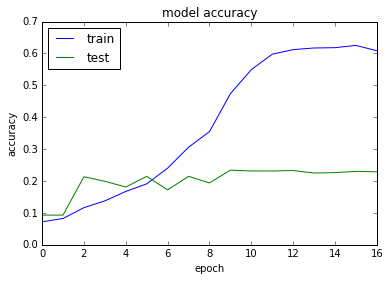

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

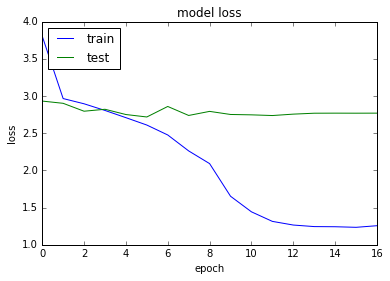

In [23]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
# Look at the weights of the first layer
layer = model.layers[0]
# this actually returns a list 
# first element is W
# second element are all the biases b
weights = layer.get_weights()
# the weights are the number of pixels times the number of filters (hidden units)
print("Shape of W")
print(weights[0].shape)

Shape of W
(3, 3, 3, 32)


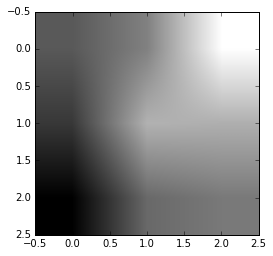

In [25]:
# look at just the first filter
w = weights[0][:,:,0,0]
w = w.reshape((3,3))
plt.imshow(w, cmap='gray')

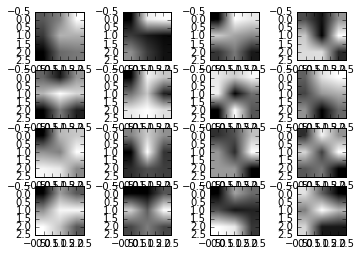

In [26]:
# make a figure for the first 25 filters
index = 0
for i in range(4):
    for j in range(4):
        w = weights[0][:,:,0,index]
        w = w.reshape(3,3)
        index+=1
        plt.subplot(4,4,index)
        plt.imshow(w, cmap='gray')    

plt.show()

# Keras - PreTrain

In [9]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
try:
    import h5py as h5py
except ImportError:
    h5py = None
try:
    import h5py
except ImportError:
    h5py = None
from keras.models import Model

Using TensorFlow backend.


In [15]:
images64 = np.load("images_numpy.npy")
genres64 = np.load("genres_numpy.npy")

In [16]:
n = len(images64)
split = int(n * .8)
x_train = images64[:split,]
x_test = images64[split:,]
y_train = genres64[:split]
y_test = genres64[split:]

In [17]:
# input image dimensions
img_rows, img_cols = 64, 64

# smaller batch size means noisier gradient, but more updates per epoch
batch_size = 128
# this is fixed, we have 13 digits in our data set
#############SHOULD BE CHANGED ONCE WE HAVE MORE DATA###############
num_classes = 21
# number of iterations over the complete training data
epochs = 30

## X_train is of shape n_samples x 64 x 64
## for a CNN we want to keep the image shape
## need to explicitly tell keras that it is a gray value image
## so each image is 28x28x1 not 28x28x3
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

# normalize image values to [0,1]
# interestingly the keras example code does not center the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (3864, 64, 64, 3)
3864 train samples
966 test samples


In [18]:
# convert class vectors to binary class matrices
# keras likes one hot encoding instead of class names
y_train = np.array(pd.get_dummies(y_train))
y_test = np.array(pd.get_dummies(y_test))

In [20]:
# dimensions of our images.
img_width, img_height = 64, 64

#Values for data
train_data_dir = x_train
validation_data_dir = x_test
nb_train_samples = 2415
nb_validation_samples = 2415
epochs = 10
batch_size = 45

#Base Model taken from Pretrained internet dataset imagenet
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

#Create top layer for the model which will be placed over the rest of the layers
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dense(21, activation='sigmoid'))

#Initiate the model with top layer
model = Model(inputs=base_model.input, outputs=top_model(base_model.output))

#compile data
sgd = SGD(lr=0.1, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd,
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing
test_datagen = ImageDataGenerator(rescale=1. / 255)

# this is a generator that will read pictures found in
# train data, and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow(train_data_dir, y_train)

#Runs the same thing above except for validation data
validation_generator = test_datagen.flow(validation_data_dir, y_test)

##Trying Fine tuning
# set the first 19 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:20]:
    layer.trainable = False
    
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [22]:
#Generate/running the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    verbose=2, workers=12)

Epoch 1/10
14s - loss: 3.1825 - acc: 0.0767 - val_loss: 3.6624 - val_acc: 0.0316
Epoch 2/10
14s - loss: 3.2009 - acc: 0.0930 - val_loss: 3.6950 - val_acc: 0.0298
Epoch 3/10
14s - loss: 3.1508 - acc: 0.0867 - val_loss: 3.5890 - val_acc: 0.0335
Epoch 4/10
14s - loss: 3.1877 - acc: 0.0902 - val_loss: 3.7195 - val_acc: 0.0341
Epoch 5/10
14s - loss: 3.1192 - acc: 0.0896 - val_loss: 3.6950 - val_acc: 0.0310
Epoch 6/10
14s - loss: 3.1983 - acc: 0.0843 - val_loss: 3.6706 - val_acc: 0.0304
Epoch 7/10
14s - loss: 3.1508 - acc: 0.0855 - val_loss: 3.6877 - val_acc: 0.0317
Epoch 8/10
14s - loss: 3.1297 - acc: 0.0949 - val_loss: 3.6298 - val_acc: 0.0304
Epoch 9/10
14s - loss: 3.1746 - acc: 0.0938 - val_loss: 3.6461 - val_acc: 0.0304
Epoch 10/10
14s - loss: 3.1904 - acc: 0.0873 - val_loss: 3.7195 - val_acc: 0.0304


In [23]:
#Get the Score of the Data
score = model.evaluate_generator(validation_generator, nb_validation_samples/batch_size, workers=12)
scores = model.predict_generator(validation_generator, nb_validation_samples/batch_size, workers=12)
print("Loss: ", score[0], "Accuracy: ", score[1])

Loss:  3.70319960181 Accuracy:  0.0316301703163


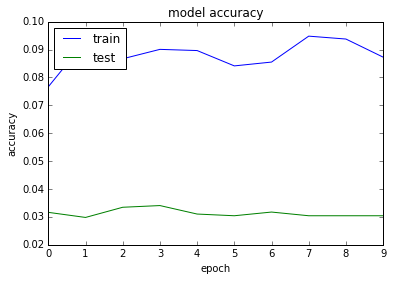

In [24]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

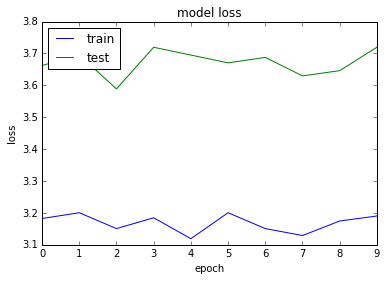

In [25]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()